In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.lines import Line2D
import sys
sys.path.insert(0, '..')

In [70]:
group = ['stroke', 'intact']
tinfo = pd.read_csv('../data/baseline/tinfo.tsv', sep='\t')
log_training = pd.DataFrame()
mapping = ['on', 'off']
for gr in group:
    for map in mapping:
        for sn in tinfo.subj_id.unique():
            log = pd.read_csv(f'../data/post_rehab/log_training.{map}-manifold.{gr}.{sn}.tsv', sep='\t')
            log_ds = log[::10]
            log_training = pd.concat([log_training, log_ds])

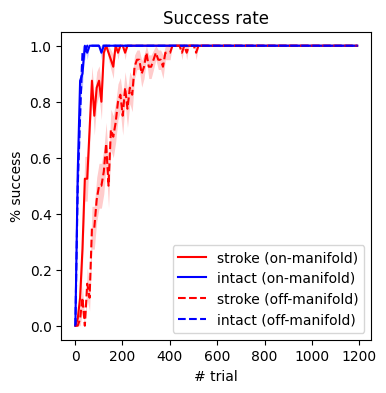

In [71]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
metric = 'success'
sb.lineplot(ax=ax, data=log_training[onm], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Success rate')
ax.set_ylabel('% success')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

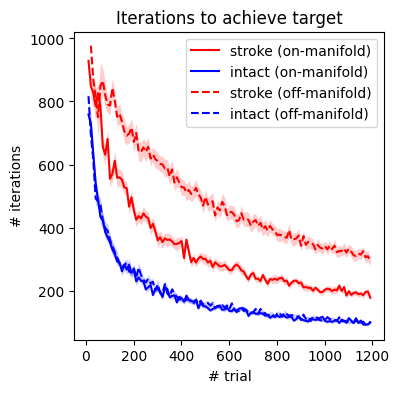

In [72]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'nsteps'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Iterations to achieve target')
ax.set_ylabel('# iterations')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

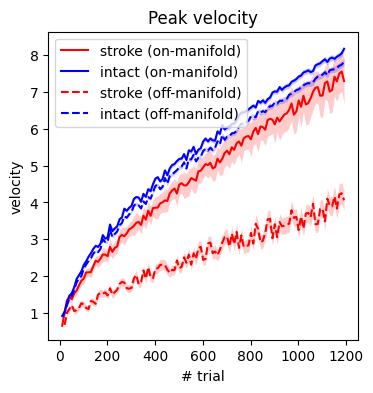

In [73]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'velMax'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Peak velocity')
ax.set_ylabel('velocity')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

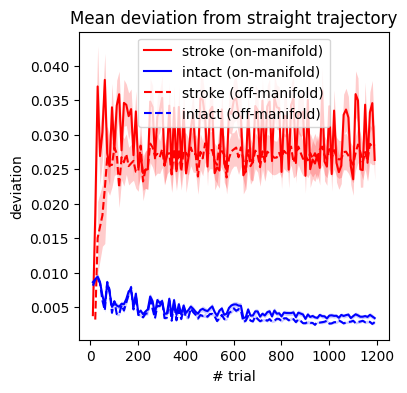

In [74]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'meanDev'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Mean deviation from straight trajectory')
ax.set_ylabel('deviation')
ax.set_xlabel('# trial')
ax.set_ylabel('deviation')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

In [ ]:
from training import simulate_trial, calc_manifold

rng = np.random.default_rng(42)
ds = 'stroke'
sn = 100
d = 5
F = np.load(f'../data/pretraining/single_finger.pretraining.{ds}.{sn}.npy')
A = np.load(f'../data/basis_vectors/basis_vectors.{ds}.{sn}.npy')
W_dec = np.load(f'../data/pretraining/W_dec.stroke.100.npy')
W_pol = np.load(f'../data/training/W_pol.off-manifold.stroke.100.npy')
Nc, K = A.shape
F_c = F.reshape(-1, Nc)
B_on, B_off = calc_manifold(F_c, d)
#W_pol = np.zeros((K, 2))
T = rng.standard_normal((B_off.shape[1], d))  # (q-d, d)
T /= np.linalg.norm(T, axis=0, keepdims=True) + 1e-12
B_mix = B_on + .1 * (B_off @ T)  # (q, d)
B_om, _ = np.linalg.qr(B_mix)
B_off = B_om[:, :d]
pos_star, traj, _ = simulate_trial(A, B_off, W_dec, W_pol, sigma_u = .1, radius=1., maxT=5000, dt=.01, tol=.001)
plt.scatter(pos_star[0], pos_star[1], marker='x')
plt.scatter(traj[:, 0], traj[:, 1], marker='o')